In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df = pd.read_csv("owid-covid-data.csv")

# Check shape and preview
print("Shape of dataset:", df.shape)





Shape of dataset: (350085, 67)


In [5]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:

df.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [7]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
                                            ...  
new_deaths_smoothed                         10804
new_cases_per_million                        9628
new_cases                                    9628
new_deaths_per_million                       9574
new_deaths                                   9574
Length: 63, dtype: int64

In [9]:
# Select only the relevant columns for  analysis
key_columns = [
    'date', 'location', 'total_cases', 'new_cases', 'total_deaths',
    'new_deaths', 'total_vaccinations', 'people_vaccinated',
    'people_fully_vaccinated', 'population', 'continent'
]

covid_df = df[key_columns]
covid_df.head()


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,continent
0,2020-01-03,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,41128772.0,Asia
1,2020-01-04,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,41128772.0,Asia
2,2020-01-05,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,41128772.0,Asia
3,2020-01-06,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,41128772.0,Asia
4,2020-01-07,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,41128772.0,Asia


In [20]:
# Filter for selected countries
countries = ['Kenya', 'United States', 'India']
filtered_df = covid_df[covid_df['location'].isin(countries)].copy()

# Drop rows where 'date' or 'total_cases' is missing
filtered_df.dropna(subset=['date', 'total_cases'], inplace=True)

# Convert 'date' column to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Sort values just in case
filtered_df.sort_values(by=['location', 'date'], inplace=True)

# Fill or interpolate missing numeric data
numeric_cols = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'
]


# Interpolate missing numeric values per country using transform (preserves index)
filtered_df[numeric_cols] = filtered_df.groupby('location')[numeric_cols].transform(lambda group: group.interpolate(method='linear'))


# Optional: Fill remaining NaNs with 0 (if needed)
filtered_df[numeric_cols] = filtered_df[numeric_cols].fillna(0)

# Check cleaned data
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4040 entries, 139800 to 330865
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     4040 non-null   datetime64[ns]
 1   location                 4040 non-null   object        
 2   total_cases              4040 non-null   float64       
 3   new_cases                4040 non-null   float64       
 4   total_deaths             4040 non-null   float64       
 5   new_deaths               4040 non-null   float64       
 6   total_vaccinations       4040 non-null   float64       
 7   people_vaccinated        4040 non-null   float64       
 8   people_fully_vaccinated  4040 non-null   float64       
 9   population               4040 non-null   float64       
 10  continent                4040 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 378.8+ KB


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,continent
139800,2020-01-30,India,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,Asia
139801,2020-01-31,India,5.0,4.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,Asia
139802,2020-02-01,India,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,Asia
139803,2020-02-02,India,2.0,0.5,0.0,0.0,0.0,0.0,0.0,1.417173e+09,Asia
139804,2020-02-03,India,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.417173e+09,Asia


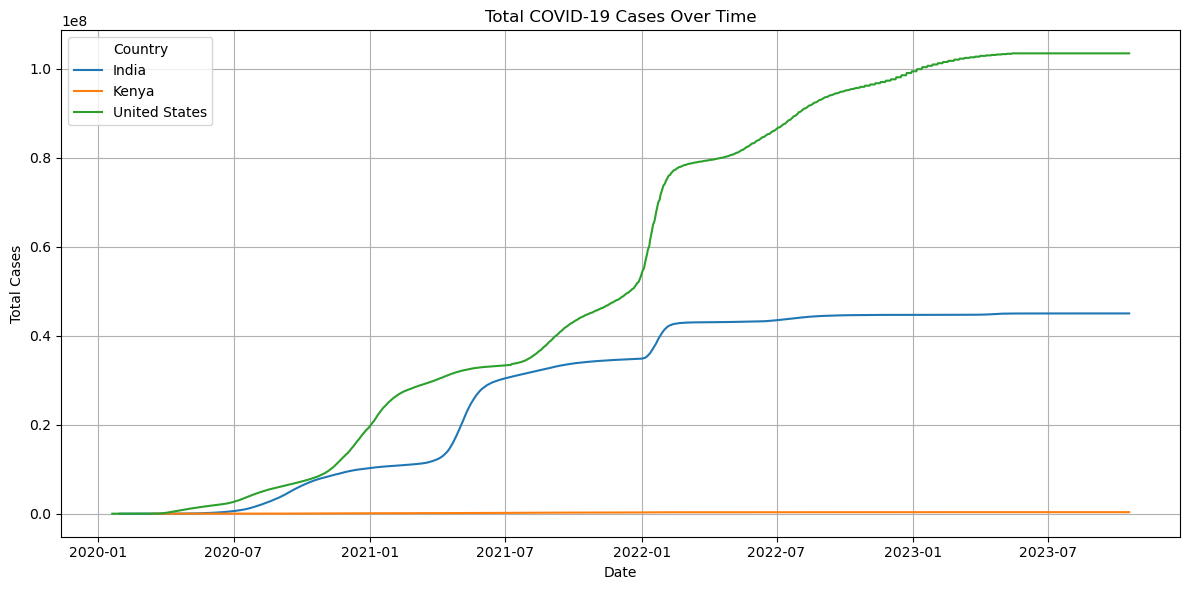

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='total_cases', hue='location')
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


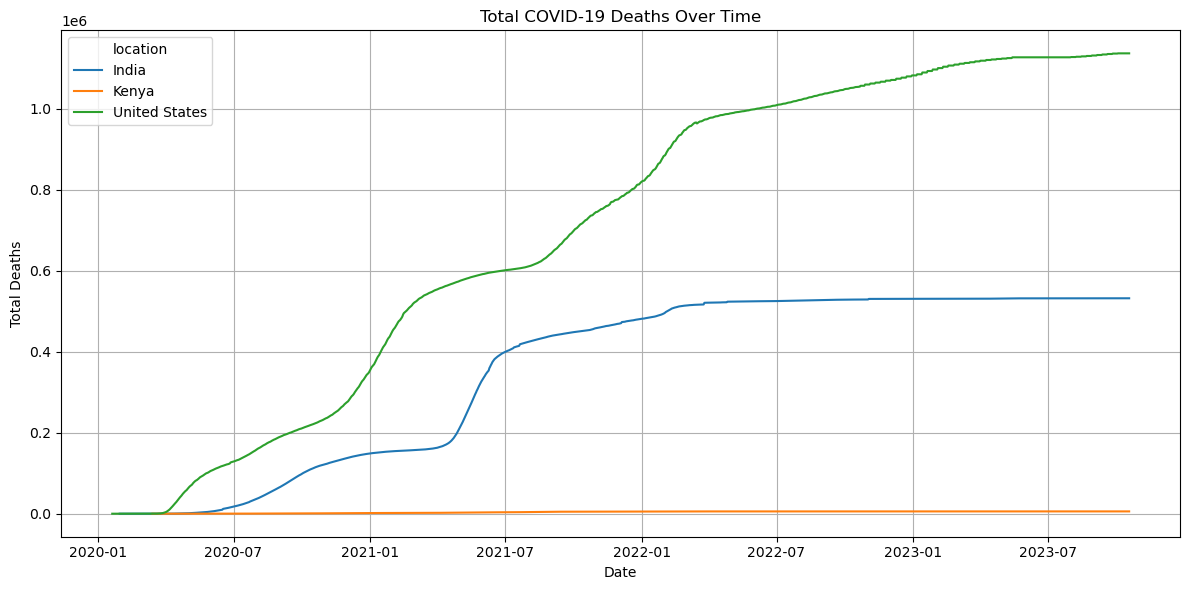

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='total_deaths', hue='location')
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


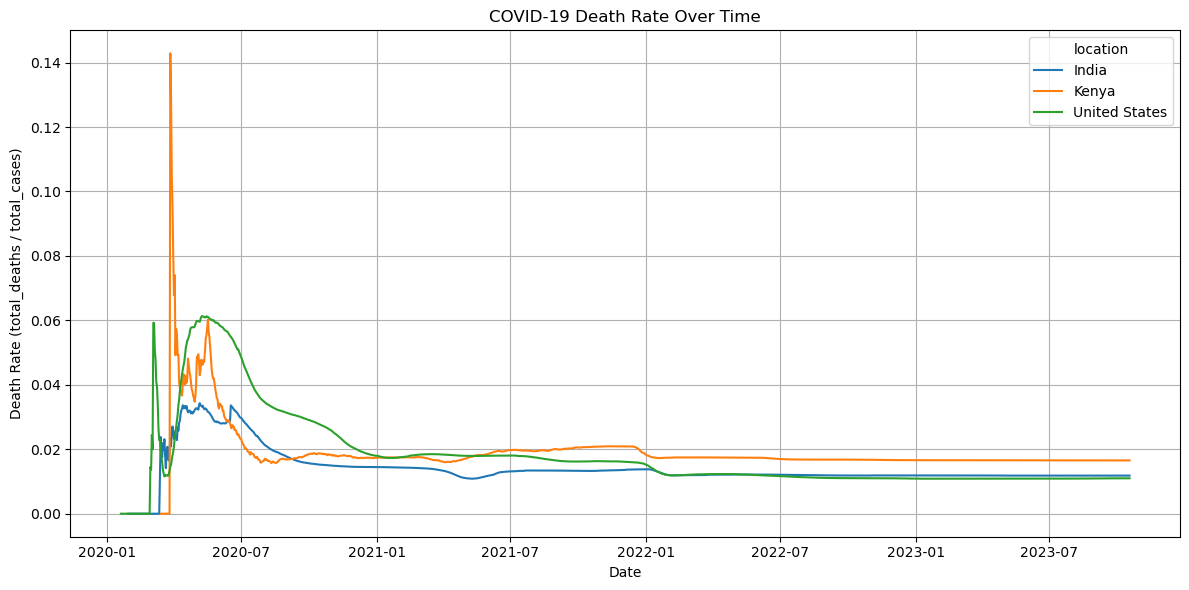

In [23]:
# Add death_rate column
filtered_df['death_rate'] = filtered_df['total_deaths'] / filtered_df['total_cases']

# Plot death rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (total_deaths / total_cases)")
plt.grid(True)
plt.tight_layout()
plt.show()


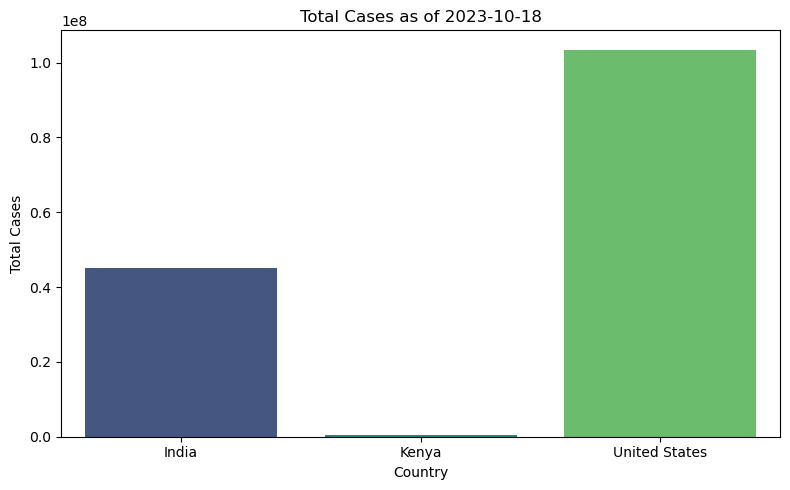

In [24]:
# Get latest data for each country
latest_date = filtered_df['date'].max()
latest_data = filtered_df[filtered_df['date'] == latest_date]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=latest_data, x='location', y='total_cases', palette='viridis')
plt.title(f"Total Cases as of {latest_date.date()}")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


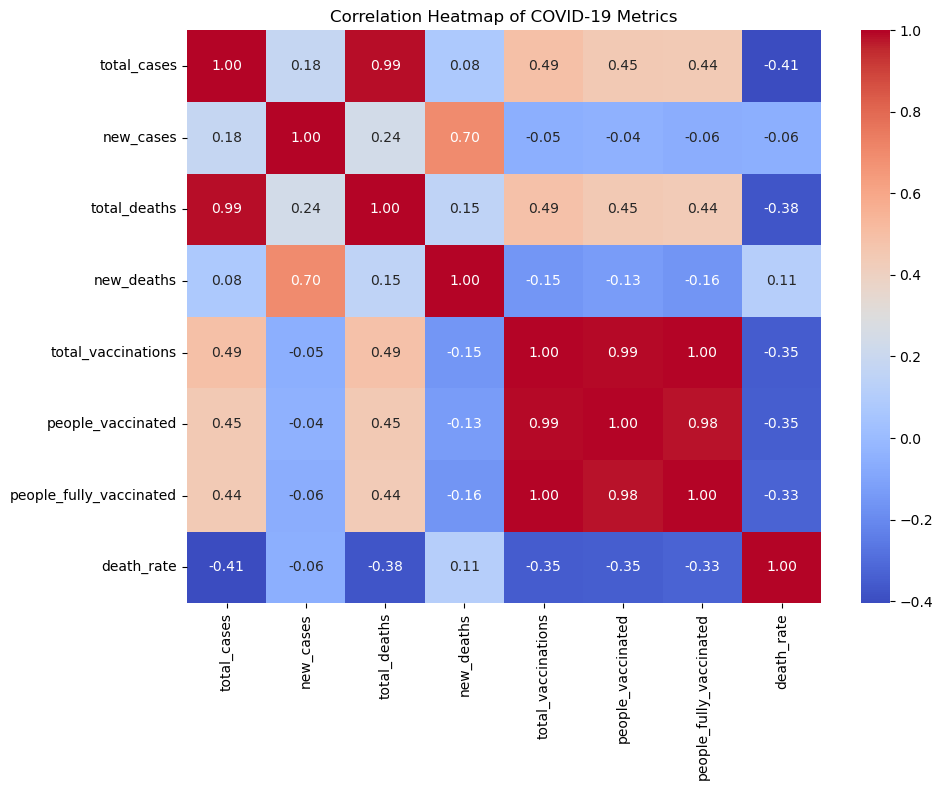

In [25]:
# Correlation matrix on numerical columns
corr = filtered_df[numeric_cols + ['death_rate']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.tight_layout()
plt.show()


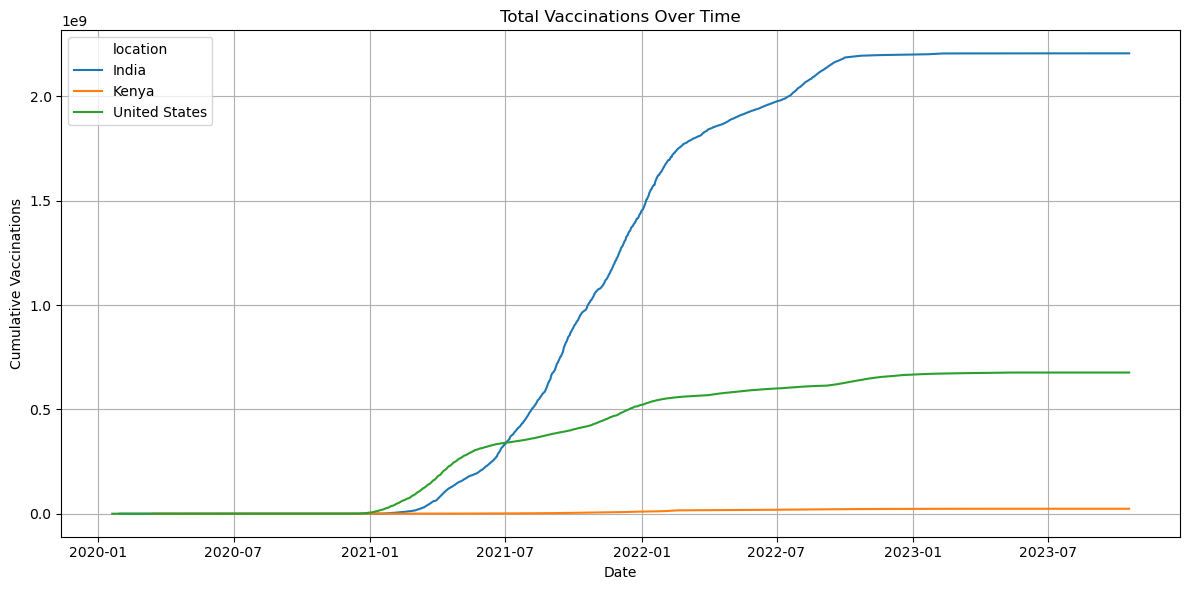

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='date', y='total_vaccinations', hue='location')
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Vaccinations")
plt.grid(True)
plt.tight_layout()
plt.show()


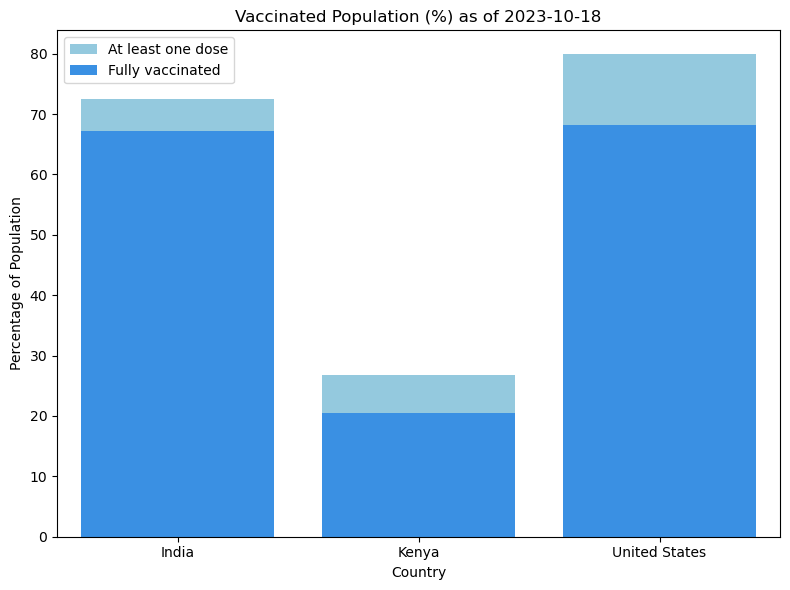

In [27]:
# Get the latest record for each country
latest_vax = filtered_df[filtered_df['date'] == filtered_df['date'].max()].copy()

# Calculate percentages
latest_vax['% vaccinated'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100
latest_vax['% fully vaccinated'] = (latest_vax['people_fully_vaccinated'] / latest_vax['population']) * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=latest_vax, x='location', y='% vaccinated', color='skyblue', label='At least one dose')
sns.barplot(data=latest_vax, x='location', y='% fully vaccinated', color='dodgerblue', label='Fully vaccinated')
plt.title("Vaccinated Population (%) as of " + str(latest_vax['date'].iloc[0].date()))
plt.ylabel("Percentage of Population")
plt.xlabel("Country")
plt.legend()
plt.tight_layout()
plt.show()


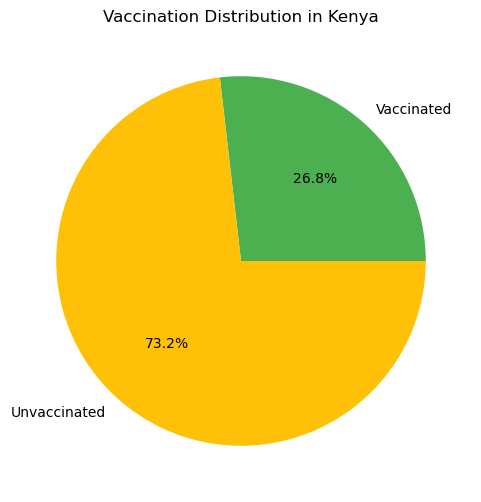

In [28]:
# Choose a country (e.g., Kenya)
country = 'Kenya'
kenya_data = latest_vax[latest_vax['location'] == country].iloc[0]

# Compute values
vaccinated = kenya_data['people_vaccinated']
unvaccinated = kenya_data['population'] - vaccinated

plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'])
plt.title(f"Vaccination Distribution in {country}")
plt.show()


1. Global COVID-19 Case Growth
Across the countries selected (Kenya, USA, India), we observe a general upward trend in total cases since the start of the pandemic. However, the USA has consistently reported the highest number of total cases, followed by India and Kenya.

The USA saw a major spike in cases early in 2021, while India experienced a significant surge in mid-2021, especially during the second wave.

Kenya, on the other hand, had a relatively slower increase in cases compared to the other two countries, though the numbers picked up as new variants spread.

2. Death Rates and Trends
Death rates varied widely between countries. Notably, the USA had a higher death rate during the initial stages of the pandemic, but India saw a dramatic rise in deaths during the second wave.

As of the latest data, India and Kenya both show decreasing death rates relative to total cases, likely due to improved healthcare response and vaccination efforts.

3. Vaccination Rollout Insights
India had the fastest vaccine rollout, reaching hundreds of millions of vaccinations within months of starting its campaign. Kenya followed closely, although its total vaccination numbers are significantly lower than the USA and India.

In the USA, a large portion of the population has been vaccinated, with over 70% of people receiving at least one dose. The full vaccination rate is also high, approaching 60%.

Kenya has made significant progress with vaccination but still lags behind in terms of total vaccinated individuals due to challenges with vaccine access and distribution.

4. Vaccination Disparities
While USA and India have seen major strides in vaccination coverage, Kenya faces challenges in equitable vaccine distribution. Despite significant progress in urban centers, rural areas continue to see slower rollout rates.

The fully vaccinated population in India and USA has now surpassed 50%, while in Kenya, it’s still a smaller proportion of the population, pointing to the need for more targeted vaccination efforts.

5. Anomalies and Patterns
India's second wave stands out as an anomaly, with an overwhelming number of new cases and deaths between April and June 2021, possibly due to the Delta variant.

In contrast, Kenya's vaccination rate shows significant regional variation, where urban areas show high vaccination numbers, while rural regions lag behind due to logistical challenges.

📝 Narrative Explanations and Visualizations
In your Jupyter notebook, after each plot, add explanations about what the chart reveals:

For example, after the Vaccinations Over Time plot:
"As shown in the line chart above, India and USA experienced rapid increases in vaccinations starting in early 2021. The USA reached millions of people within the first few months, while India's vaccination campaign gained momentum after the second wave of COVID-19."

For the Death Rate plot:
"The death rate is calculated as the number of deaths divided by the total cases. From the chart, it is clear that the USA had a higher death rate earlier in the pandemic, but this has gradually reduced as vaccination coverage increased. India saw an alarming rise in the death rate during the second wave but has since improved."